In [14]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from datetime import datetime

In [15]:
cosmos_csv_file = "../03-Presentations/Resources/archive/coin_Cosmos.csv"
cosmos_data_df = pd.read_csv(cosmos_csv_file)

In [16]:
type(cosmos_data_df["Date"])

pandas.core.series.Series

In [17]:
cosmos_data_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cosmos,ATOM,2019-03-15 23:59:59,7.715249,6.432468,6.633174,7.504351,6.057301e+06,0.0
1,2,Cosmos,ATOM,2019-03-16 23:59:59,8.305615,6.694531,7.507990,7.383882,3.477393e+06,0.0
2,3,Cosmos,ATOM,2019-03-17 23:59:59,7.357443,4.727895,7.357443,4.776164,2.653565e+06,0.0
3,4,Cosmos,ATOM,2019-03-18 23:59:59,5.229982,4.828242,4.828242,5.110341,2.567201e+06,0.0
4,5,Cosmos,ATOM,2019-03-19 23:59:59,5.206172,4.794501,5.099978,4.821883,3.891084e+06,0.0


In [18]:
new_cosmos_data_df = cosmos_data_df[['Symbol', 'High', 'Low']].copy()
new_cosmos_data_df.head()

,Symbol,High,Low
0,ATOM,7.715249,6.432468
1,ATOM,8.305615,6.694531
2,ATOM,7.357443,4.727895
3,ATOM,5.229982,4.828242
4,ATOM,5.206172,4.794501


In [19]:
cosmos_data_df['DateOnly'] = cosmos_data_df['Date'].map(lambda x: x.split()[0])
cosmos_data_df.head()
cosmos_data_df['TimeOnly'] = cosmos_data_df['Date'].map(lambda x: x.split()[1])
cosmos_data_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,DateOnly,TimeOnly
0,1,Cosmos,ATOM,2019-03-15 23:59:59,7.715249,6.432468,6.633174,7.504351,6.057301e+06,0.0,2019-03-15,23:59:59
1,2,Cosmos,ATOM,2019-03-16 23:59:59,8.305615,6.694531,7.507990,7.383882,3.477393e+06,0.0,2019-03-16,23:59:59
2,3,Cosmos,ATOM,2019-03-17 23:59:59,7.357443,4.727895,7.357443,4.776164,2.653565e+06,0.0,2019-03-17,23:59:59
3,4,Cosmos,ATOM,2019-03-18 23:59:59,5.229982,4.828242,4.828242,5.110341,2.567201e+06,0.0,2019-03-18,23:59:59
4,5,Cosmos,ATOM,2019-03-19 23:59:59,5.206172,4.794501,5.099978,4.821883,3.891084e+06,0.0,2019-03-19,23:59:59


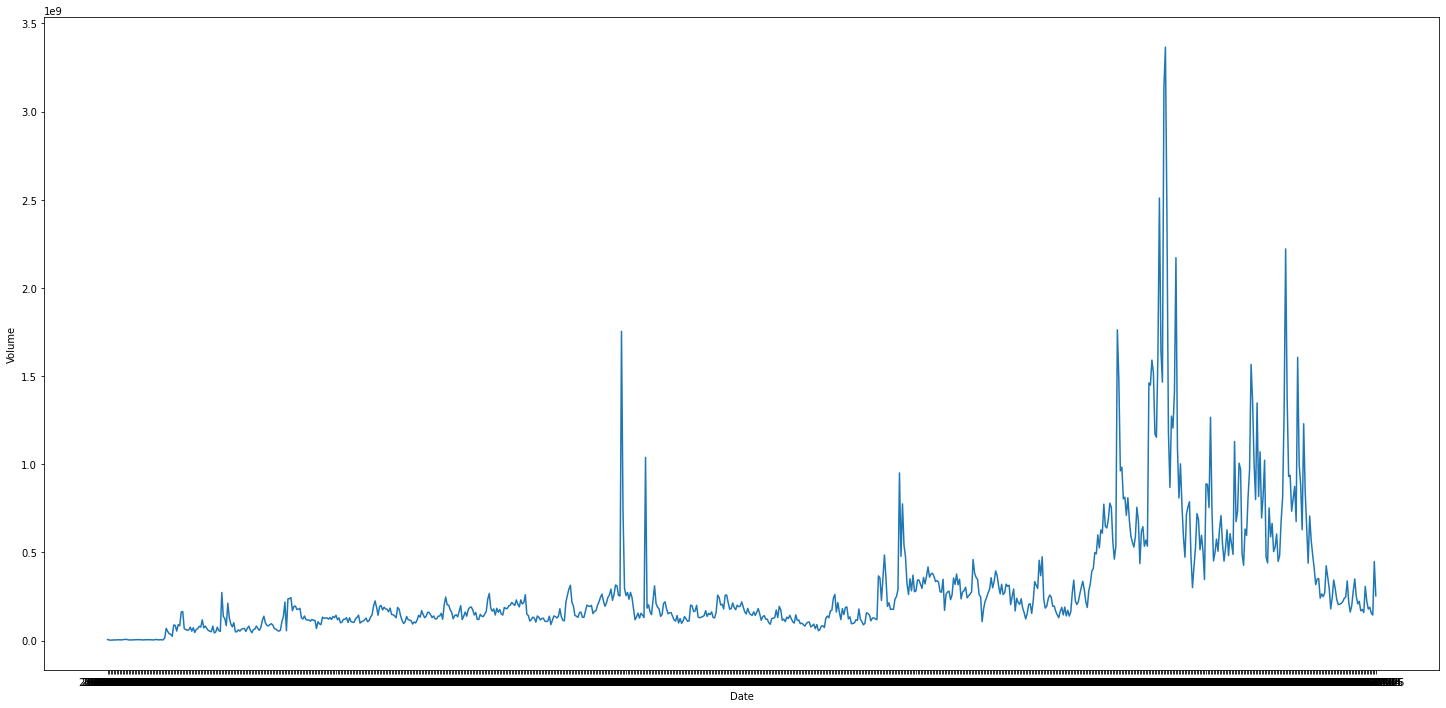

In [20]:
#x = cosmos_data_df['DateOnly']
#y = cosmos_data_df['High']

plt.figure(figsize=(25, 12))
x = range(len(cosmos_data_df['DateOnly']))
plt.plot(x, cosmos_data_df['Volume'])
plt.xticks(x, cosmos_data_df['DateOnly'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [21]:
# Remove the rows with missing data
new_cosmos_data_df = new_cosmos_data_df.dropna(how="any")
new_cosmos_data_df.count()
# Display a statistical overview of the DataFrame
new_cosmos_data_df.describe()

,High,Low
count,845.000000,845.000000
mean,7.141688,6.367329
std,6.347047,5.496657
min,1.813534,1.130963
25%,3.533852,3.193769
50%,4.687904,4.285959
75%,6.536582,5.838377
max,32.136865,26.906526


In [22]:
rds_connection_string = "postgres:rocket211@localhost:5432/Crypto_DB"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [23]:
new_cosmos_data_df = cosmos_data_df[["Symbol", "High", "Low"]].copy()
new_cosmos_data_df.head()

,Symbol,High,Low
0,ATOM,7.715249,6.432468
1,ATOM,8.305615,6.694531
2,ATOM,7.357443,4.727895
3,ATOM,5.229982,4.828242
4,ATOM,5.206172,4.794501


In [24]:
rds_connection_string = "postgres:rocket211@localhost:5432/Crypto_DB"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [25]:
new_cosmos_data_df.to_sql(name='Cosmos', con=engine, if_exists='append', index=False)

In [26]:
pd.read_sql_query('select * from "Cosmos"', con=engine)

,Symbol,High,Low
0,ATOM,7.715249,6.432468
1,ATOM,8.305615,6.694531
2,ATOM,7.357443,4.727895
3,ATOM,5.229982,4.828242
4,ATOM,5.206172,4.794501
...,...,...,...
10980,ATOM,11.764925,10.543935
10981,ATOM,12.198276,11.540298
10982,ATOM,12.433965,11.520693
10983,ATOM,13.968271,11.955753
